# Kernalization

Please watch before proceed [Machine Learning Lecture 22 "More on Kernels" -Cornell CS4780 SP17](https://www.youtube.com/watch?v=FgTQG2IozlM&list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS&index=22)


In this tutorial, we will learn

1. What is a kernel function, kernel matrix ?
2. Some Kernel functions: linear, polynomial, rbf, exponential, and laplacian
3. How can we kernalize linear regression ?
4. How can we kernalize Support Vector Machine?

### Setup

$$ \mathcal D = \{(x_i,y_i) \}_{i=1} ^n $$


$$ \mathcal D \sim \mathbb P(\mathcal X, \mathcal Y)$$




$$ k: \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}$$

**kernel function**. $$ k(x,x^{'}) = < \Phi(x), \Phi(x^{'}) >$$ where $\Phi$ maps into some dot product space $\mathcal{H}$, that is also called the $\textit{feature space}$. $k$ and $\Phi$ are called a kernel and its feature map. 



### Some properties of a kernel function 

#### 1. Gram matrix
Given a kernel $k$ and inputs $x_1 , \dots , x_n \in \mathcal{X}$, the  $ n \times n $ matrix is called the Gram matrix

$$ K:= ( k (x_i,x_j))_{ij} $$



#### 2. Positive Definite Matrix.
A real $ n \times n $ symmetric matrix $K_{ij}$ satisfiying

$$ \Sigma_{i,j} c_i c_j K_{ij} \geq 0$$ for all $c_i \in \mathbb{R}$ is called positive definite.


For many others we refer [1,2].

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

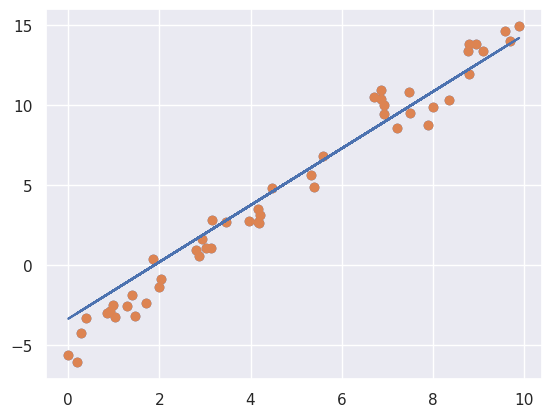

In [10]:
class LinearReg:
    def __init__(self,print_loss=False):
        self.lr=.001
        self.epoch=5000
        self.print_loss=print_loss
        self.reg=.5
        pass
    def fit(self,X,y):        
        self.w=np.random.randn(1)
        self.b=np.random.randn(1)
        for i in range(self.epoch):
            pred=X*self.w+self.b
            # Error with clipping 
            error=np.clip(y-pred, -10, 10)
            
            # (y-(Xw)**2
            sqrt_loss=((error)**2).mean() + self.reg*(self.w**2 + self.b**2)

            dpred= 2*error
            dw=-(dpred *X).mean() + .5 * self.reg*self.w
            db=-dpred.mean() + .5 * self.reg*self.b
        
            self.w -= self.lr*dw
            self.b -= self.lr*db
            
            if i %(self.epoch//10)==0:
                if self.print_loss:
                    print(sqrt_loss)

        return self
    def predict(self,X):
        return X*self.w+self.b

    
rng = np.random.RandomState(1)
X = 10 * rng.rand(50)
Y = 2 * X - 5 + rng.randn(50)
plt.scatter(X, Y)

lr=LinearReg().fit(X,Y)
plt.scatter(X, Y)
plt.plot(X, lr.predict(X))

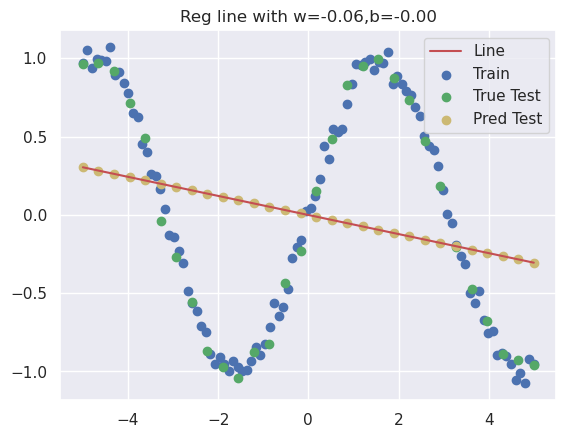

In [11]:

## Define a true function 
def f(x):
    return np.sin(x)#+(x/25)**2

def generate_input(n):
    return np.linspace(-5, 5, num=n)

N = 100    # number of training points.
n = 30     # number of testing points.
s = 0.05    # noise variance.

#X = np.arange(N)#.reshape(N,1)
#X = N * rng.rand(N)

X = generate_input(N)
Y = f(X)+s*np.random.randn(N)


Xtest= generate_input(n)
Ytest= f(Xtest) +s*np.random.randn(n)

lr=LinearReg().fit(X,Y)
plt.scatter(X, Y,label='Train')
plt.plot(X, lr.predict(X),c='r',label='Line')
plt.scatter(Xtest, Ytest,c='g',label='True Test')
plt.scatter(Xtest, lr.predict(Xtest),c='y',label='Pred Test')
plt.title(f'Reg line with w={lr.w[0]:.2f},b={lr.b[0]:.2f}')
plt.legend();

### Kernels
The squared exponential kernel or Gaussian kernel is defined by

$$ k(x,x^{'}) =  exp\bigg( -\frac{1}{2}(x-x^{'})^T \Sigma^{-1} x-x^{'} \bigg) $$


if $\Sigma$ is diagonal, Gaussian kernel is reduced to



$$ k(x,x^{'}) =  \mathbf{e}^{-\frac{1}{2\sigma^2}(x-x^{'})^2}$$


$$ k(x,x^{'}) =  exp\bigg( -\frac{|| x-x^{'}||^2}{2\sigma^2} \bigg)   $$


In [12]:
def gaussian_function(x,sigma=.2,mu=0):
    return np.exp(-0.5 * ( 1/np.power(sigma,2) ) * ( np.power(x-mu,2)))

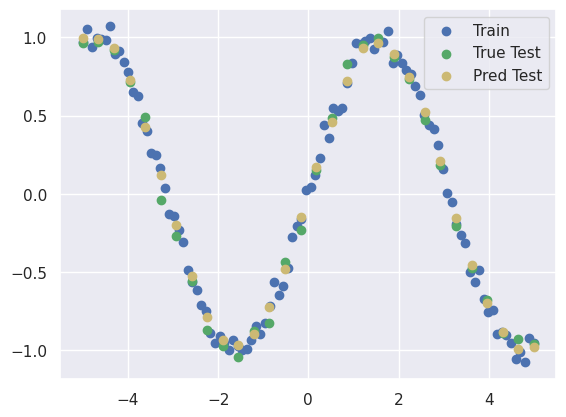

In [13]:
predictions=[]
# Iterate over test points
for point in Xtest:
    weights=[]
    # for each test point, compute kernel values 
    for index in range(len(X)):
        w=gaussian_function(point-X[index])
        weights.append(w)

    # N weights for N train data points
    weights=np.array(weights).reshape(1,len(weights))
    # Dot average of labels based on weights
    p=weights@Y/weights.sum()
    predictions.append(p[0])

plt.scatter(X, Y,label='Train')
plt.scatter(Xtest, Ytest,c='g',label='True Test')
plt.scatter(Xtest, predictions,c='y',label='Pred Test')
plt.legend();

In [14]:
def linear_kernel(x,y):
    return np.sum(x*y)

def polynomial_kernel(x,y,d=3):
    return (1+np.sum(x*y))**d

def rbf(a,b,sigma=.2,mu=0):
    x=a-b
    return np.exp(-0.5 * ( 1/np.power(sigma,2) ) * ( np.power(x-mu,2)))

def exponential_kernel(a,b,sigma=.2,mu=0):
    x=a-b
    return np.exp(-0.5 * ( 1/(2*np.power(sigma,2)) ) * ( np.power(x-mu,2)))

def laplacian_kernel(a,b,sigma=.2,mu=0):
    x=a-b
    return np.exp(-0.5 * ( 1/(2*np.power(sigma,2)) ) * ( np.abs(x-mu)))


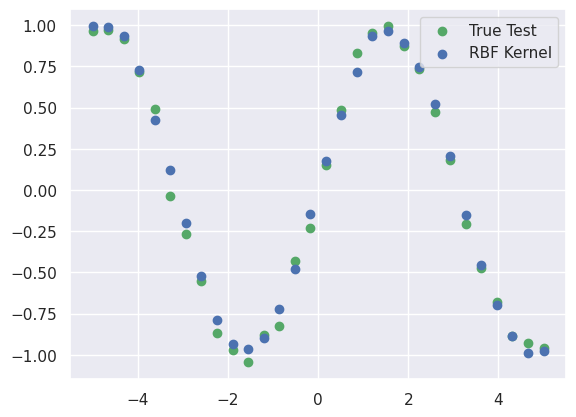

In [15]:
class Kernalized_LinearReg:
    def __init__(self,print_loss=False):
        pass
    
    def fit(self,X,y):
        self.X=X
        self.Y=y
        return self
    def predict(self,X,kernel):
        predictions=[]
        # Iterate over test points
        for point in X:
            weights=[]
            # for each test point, compute kernel values 
            for index in range(len(self.X)):
                w=kernel(point,self.X[index])
                weights.append(w)

            # N weights for N train data points
            weights=np.array(weights).reshape(1,len(weights))
            # Dot average of labels based on weights
            p=weights@self.Y/weights.sum()
            predictions.append(p[0])
        return np.array(predictions)

lr=Kernalized_LinearReg().fit(X,Y)
#plt.scatter(X, Y,c='b',label='Train')

plt.scatter(Xtest, Ytest,c='g',label='True Test')
plt.scatter(Xtest, lr.predict(Xtest,rbf),label='RBF Kernel')
#plt.scatter(Xtest, lr.predict(Xtest,exponential_kernel),label='Exponential Kernel')
#plt.scatter(Xtest, lr.predict(Xtest,laplacian_kernel),label='Laplacian kernel Kernel')
plt.legend();

__Kernels are "magical", aren't they ?__

# Support Vector Machine

## SVM Loss

$$argmin_{w,b} \; w^T w $$
$$ s.t.$$
$$ \forall (x_i,y_i) \in \mathcal D : y_i (w^T x_i +b) \ge 1$$



## SVM Loss with Slack Variable

$C$ is a hyperparameter
$$argmin_{w,b} \; w^T w \sum_i ^n + \; C \sum_i ^n \xi_i$$
$$ s.t.$$
$$ \forall (x_i,y_i) \in \mathcal D : y_i (w^T x_i +b) \ge 1 - \xi_i\\
\forall i \; \xi_i \ge 0
$$

# SVM loss as Hinge loss with l2 norm


$$ \mathcal L (w) = w^T w + C \sum_i max(1-y_i(w^T x_i + b),0)$$



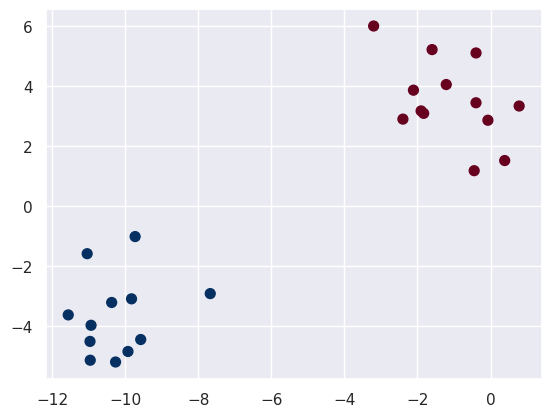

In [18]:
X, y = make_blobs(25, 2, centers=2, random_state=1, cluster_std=1.4)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu');

Loss:224.24 ||W||=0.813, Acc:0.44
Loss:0.00057975 ||W||=0.038, Acc:1.0
Loss:0.00057501 ||W||=0.039, Acc:1.0
Loss:0.0005705 ||W||=0.040, Acc:1.0
Loss:0.00056614 ||W||=0.041, Acc:1.0
Loss:0.00056193 ||W||=0.042, Acc:1.0
Loss:0.00055789 ||W||=0.043, Acc:1.0
Loss:0.00055402 ||W||=0.044, Acc:1.0
Loss:0.00055029 ||W||=0.045, Acc:1.0
Loss:0.0005467 ||W||=0.045, Acc:1.0
Acc.: 1.0


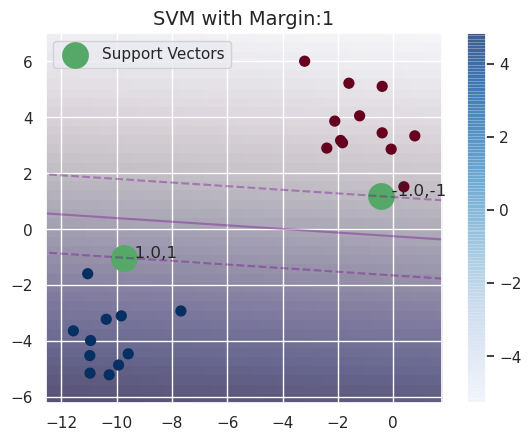

In [20]:
class SVM:
    def __init__(self,margin=1,C=2,reg=0.001,lr=.0001,iteration=10**6):
        self.margin=margin
        self.C=C
        self.reg=reg
        self.lr=lr
        self.w=None
        self.iteration=iteration
        
    def compute_hinge_loss(self):
        # err=1-(Y * (Xw))
        # derr=-YW
        z=self.y*(self.X@self.w)
        hinge_loss=np.maximum(self.margin-z,0)
        idx=np.where(hinge_loss > 0)
        dh_loss=-self.y[idx].T@self.X[idx]
        return hinge_loss,dh_loss
    
    def svm_loss(self):
        # (1) Compute the hingle loss
        hinge_loss, dhinge_loss=self.compute_hinge_loss()
        # (2) Compute SVM loss: Hinge Loss + l2
        svm_loss=self.reg*(np.sum(self.w**2))+ self.C*hinge_loss.sum()        
        # (3) Compute the average the gradient of hinge loss
        dhinge_loss/=self.n
        dhinge_loss*=self.C
        # (4) Compute gradient of regularization
        dl2=self.reg*2*self.w
        # (5) Compute derivative of the loss w.r.t. w.
        dw=dhinge_loss+dl2

        return svm_loss, dw
    
    def fit(self,X,y):
        # (1) Add ones to input.
        self.X=np.hstack((X,np.ones((len(X),1))))
        # (2) Add bias into weights.
        self.w=np.random.randn(self.X.shape[1])
        self.y=y
        # (3) number of data points.
        self.n=len(self.X)
        # Convert 0 to -1.
        y[y==0]=-1
        
        for i in range(self.iteration):
            #(4) Compute SVM loss and Compute derivative of loss w.r.t. w.
            svm_loss,dw=self.svm_loss()
            # (5) Update w in the negative direction of derivative.
            self.w-=self.lr*dw    
            if i %(self.iteration//10)==0:
                print(f'Loss:{svm_loss:.5} ||W||={np.sqrt(self.w**2)[0]:.3f}, Acc:{(y==self.predict(X)).mean()}')
                
                if svm_loss==0:
                    print('ZERO loss')
                    break
        return self
    
    def decision_function(self,X):
        X=np.hstack((X,np.ones((len(X),1))))
        return X@self.w
    
    def predict(self,X):
        pred=(self.decision_function(X)>0)*1
        pred[pred==0]=-1
        return pred
    
    
    def plot_decision_boundary(self,X,y):
        fig, ax = plt.subplots()
        ax.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='RdBu')
        ax.set_title(f'SVM with Margin:{self.margin}', size=14)
        
        xx_min,xy_min=X.min(axis=0)
        xx_max,xy_max=X.max(axis=0)

        # Visualization works perfectly
        xlim,ylim = (xx_min-1, xx_max+1), (xy_min-1, xy_max+1)
        xg = np.linspace(xlim[0], xlim[1], 60)
        yg = np.linspace(ylim[0], ylim[1], 40)
        xx, yy = np.meshgrid(xg, yg)
        Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
        for label, color in enumerate(['red', 'blue']):
            Pm=self.decision_function(Xgrid)
            c=ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,cmap=color.title() + 's')
            ax.contour(xx, yy, Pm.reshape(xx.shape),levels=[-self.margin,0,self.margin],
                       colors=color,linestyles=['--', '-', '--'],alpha=0.2)
        fig.colorbar(c, ax=ax)
        
        
        P=self.decision_function(X)
        self.support_vectors_=X[(np.where((P <1.1) & (P >-1.1)))]
    
        
        ax.set(xlim=xlim, ylim=ylim)
        
        
        plt.scatter(self.support_vectors_[:, 0],self.support_vectors_[:, 1],s=300, linewidth=2, facecolors='g',label='Support Vectors');
        
        pred=self.decision_function(X)
        for i in range(len(X)):
            if -1.1<pred[i]<1.1:
                plt.annotate(f'  {pred[i]:.3},{y[i]}',xy=(X[i]))
        plt.legend()
        plt.show()
        
svm=SVM().fit(X,y)
print('Acc.:',(y==svm.predict(X)).mean())
svm.plot_decision_boundary(X,y)

# Kernalized Support Vector Machine


### RECAP Linear SVM
$$ min_{w,b} \; \; w^T w + C \sum_{i=1} ^N \xi_i \\ s.t. \\
\forall \; i \; \; y_i (w^T x_i +b) \ge 1 - \xi_i \\ \xi_i \ge 0
$$


$$ \mathcal L (w) = w^T w + C \sum_i max(1-y_i(w^T x_i),0)$$

$$ min_{\alpha_1, \dots, \alpha_n} \frac{1}{2} \sum_{i,j} \alpha_i \alpha_j y_i y_j K_{ij} - \sum_{i=1} ^n \alpha_i \\ s.t. 0\le a_i <C \\ \sum_i ^n \alpha_i y_i = 0$$


The decision boundary becomes 
$$ h(x) = sign \big(\sum_i ^n \alpha_i y_i k(x_i,x) + b \big)$$

###  Kernalized SVM
$$ min_{w,b} \; \; w^T w + C \sum_{i=1} ^N \xi_i \\ s.t. \\
\forall \; i \; \; y_i (w^T x_i +b) \ge 1 - \xi_i \\ \xi_i \ge 0
$$


$$ \mathcal L (w) = w^T w + C \sum_i max(1-y_i(w^T \phi(x_i)+b),0)$$

# Faster implementation

In [ ]:
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)
#gram_matrix=kernel(Xtest,X)
"""
predictions=[]
for index in range(len(Xtest)):
    p=gram_matrix[index]@y/gram_matrix[index].sum()
    predictions.append(p)
    
plt.scatter(Xtest,ytest)
plt.scatter(Xtest,predictions,color='red')
"""